In [1]:
#Code using PyTorch Framework
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

# Define constants
batch_size = 128
num_classes = 10
epochs = 2

# Load the MNIST dataset using PyTorch
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the pixel values to the range [-1, 1]
])

# Use torchvision's DataLoader directly for simplicity
train_loader = DataLoader(
    torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True),
    batch_size=batch_size, shuffle=True
)

test_loader = DataLoader(
    torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True),
    batch_size=batch_size, shuffle=False
)

# Prepare the data
def prepare_data(dataset):
    x = dataset.data.view(-1, 784).float() / 255.0
    y = dataset.targets
    return x, y

x_train, y_train = prepare_data(train_loader.dataset)
x_test, y_test = prepare_data(test_loader.dataset)

print(x_train.size(0), 'train samples')
print(x_test.size(0), 'test samples')

# Simple Neural Network Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(784, num_classes)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc(x)
        return x

model = SimpleNN()
# Print model summary
print(model)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")


100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

60000 train samples
10000 test samples
SimpleNN(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)
Total number of parameters: 7850


Epoch [1/2], Loss: 0.4376, Accuracy: 87.75%
Epoch [2/2], Loss: 0.3011, Accuracy: 91.45%


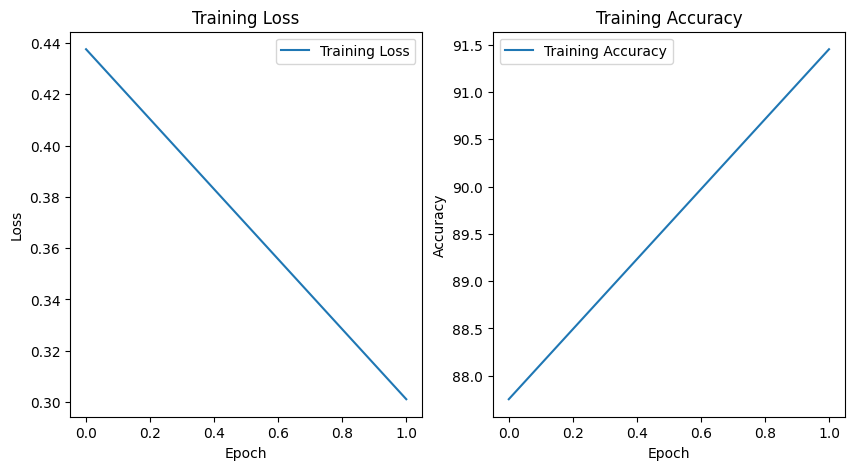

In [2]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming train_loader, model, criterion, optimizer, and epochs are defined

train_loss_history = []
train_accuracy_history = []

# Training
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()


In [3]:
# Testing
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print('Accuracy on the test set: {:.2%}'.format(accuracy))


Accuracy on the test set: 91.98%


In [4]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the MNIST dataset using scikit-learn
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data / 255.0, mnist.target.astype(int)

# Split the dataset into training and testing sets
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
print("Standardizing features...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a linear SVM classifier
print("Creating and training a linear SVM classifier...")
model = svm.LinearSVC(max_iter=10, dual=False)  # Explicitly set dual to suppress the warning
model.fit(X_train, y_train)

# Predictions on the test set
print("Predicting on the test set...")
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on the test set: {:.2%}'.format(accuracy))


Loading MNIST dataset...
Splitting dataset into training and testing sets...
Standardizing features...
Creating and training a linear SVM classifier...
Predicting on the test set...
Accuracy on the test set: 91.19%
